Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

Importing Dataset

In [2]:
names = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality')
df = pd.read_csv('winequality-white.csv', names = names)

Exploratory Data Analysis

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<AxesSubplot:>

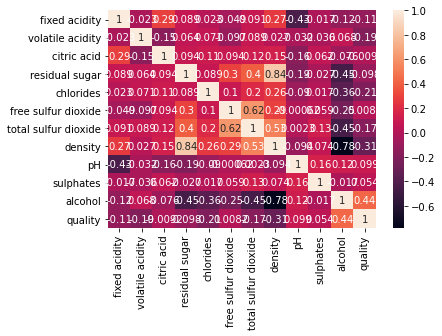

In [12]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

Regression

In [13]:
y = df.quality
x = df.drop('quality', axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 176)

In [14]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(3918, 11) (980, 11) (3918,) (980,)


In [17]:
models = {'LinearRegression' : make_pipeline(StandardScaler(), LinearRegression()),
    'Lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'Ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'ElasticNet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))}


In [18]:
models

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingregressor',
                  GradientBoostingRegressor(random_state=123))])}

In [22]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

LinearRegression
Lasso
Ridge
ElasticNet
RandomForest
GradientBoosting


In [23]:
models_fit

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingregressor',
                  GradientBoostingRegressor(random_state=123))])}

In [30]:
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    print(f'{name:}')
    print(f'{r2_score(ytest, ypred)}')
    print(f'{mae(ytest, ypred)}')

LinearRegression
0.2663000407651456
0.6095673068567867
Lasso
-0.0019215052029624147
0.6961840172516174
Ridge
0.2662276983610542
0.609598659654874
ElasticNet
-0.0019215052029624147
0.6961840172516174
RandomForest
0.5181708040464388
0.45686734693877545
GradientBoosting
0.3780350456118674
0.5691980444514295
